In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, violinplot

FUNCIONES

In [4]:
def graph(df, column):
    with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (12,4))

        plot0=sns.histplot(data= df, x=column, kde=True,ax=axes[0],color='green')
        axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        axes[0].set_title('Distribution',fontdict={'fontsize':8})
        axes[0].set_xlabel(column,fontdict={'fontsize':7})
        axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
        plt.tight_layout()

        plot1=sns.boxplot(data=df[column],ax=axes[1], orient="v")
        axes[1].set_title('Distribution of popularity',fontdict={'fontsize':8})
        axes[1].set_xlabel(column,fontdict={'fontsize':7})
        plt.tight_layout()
        
def frecDF(df, column):
    # count y convert de popularity
    frec = df[column].value_counts().sort_index()
    frec_df = pd.DataFrame(frec)
    #Asignamos el nombre Frec_abs a la columna
    frec_df.rename(columns={column:'Frec_abs'},inplace=True)
    #Obtenemos los valores de las Frecuencias Absolutas
    Frec_abs_val = frec_df["Frec_abs"].values
    #Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
    acum = []
    #Iniciamos una variable en la que guardaremos los valores anteriores
    valor_acum = 0
    #Recorremos la lista  de las frecuencias absolutas para irlas sumando
    for i in Frec_abs_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)   
    frec_df["frec_abs_acum"] = acum
    #Calculamos la Frecuencia Relativa en %
    frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(df.popularity),4)
    #Obtenemos los valores de las Frecuencias Relativas
    Frec_rel_val = frec_df["frec_rel_%"].values
    #Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
    acum = []
    #Iniciamos una variable  en la que guardaremos los valores anteriores
    valor_acum = 0
    #Recorremos la lista  de las frecuencias relativas para irlas sumando
    for i in Frec_rel_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)  
    frec_df["frec_rel_%_acum"] = acum
    return frec_df

In [5]:
df = pd.read_csv('../../datasetsGrandes/spotifySongs/tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Exploración

In [6]:
df.shape

(586672, 20)

In [7]:
df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [8]:
df.count()

id                  586672
name                586601
popularity          586672
duration_ms         586672
explicit            586672
artists             586672
id_artists          586672
release_date        586672
danceability        586672
energy              586672
key                 586672
loudness            586672
mode                586672
speechiness         586672
acousticness        586672
instrumentalness    586672
liveness            586672
valence             586672
tempo               586672
time_signature      586672
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


Vamos a analizar --> popularity / energy / tempo

In [11]:
df.popularity.describe()

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

Eliminamos los 0s de popularity para ver como quedaria una gráfica potable (acá no sabemos si en realidad + de 40K de songs no fueron puntuadas o si las puntuaron con 0)

In [12]:
df_popularity=df[df['popularity']!=0]
df_popularity.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.151,0.127,104.851,3
13,0QiT0Oo5QdLXdFw6RDOj7h,Tu Verras Montmartre,1,186800,0,['Lucien Boyer'],['4mSouLpNSEY1d7OdIjlFiP'],1922,0.703,0.2800,0,-15.390,1,0.1740,0.995,0.000068,0.163,0.897,127.531,4
26,112adU33vo4C1eRZct2hWy,Nuits De Chine,4,180800,0,['Louis Lynel'],['28pbIiOohRRZjqpAM9iqYM'],1922,0.420,0.2880,7,-14.005,1,0.0701,0.994,0.000216,0.196,0.400,139.575,3
149,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,177133,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1923,0.614,0.0423,4,-12.033,1,0.0535,0.996,0.002930,0.183,0.211,89.822,4
150,3eMrYc092k7SIJfWJ7oasR,Weather Bird,38,161933,0,"['Louis Armstrong', 'Earl Hines']","['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",1923,0.831,0.2620,8,-12.386,1,0.0942,0.984,0.912000,0.204,0.901,104.606,4


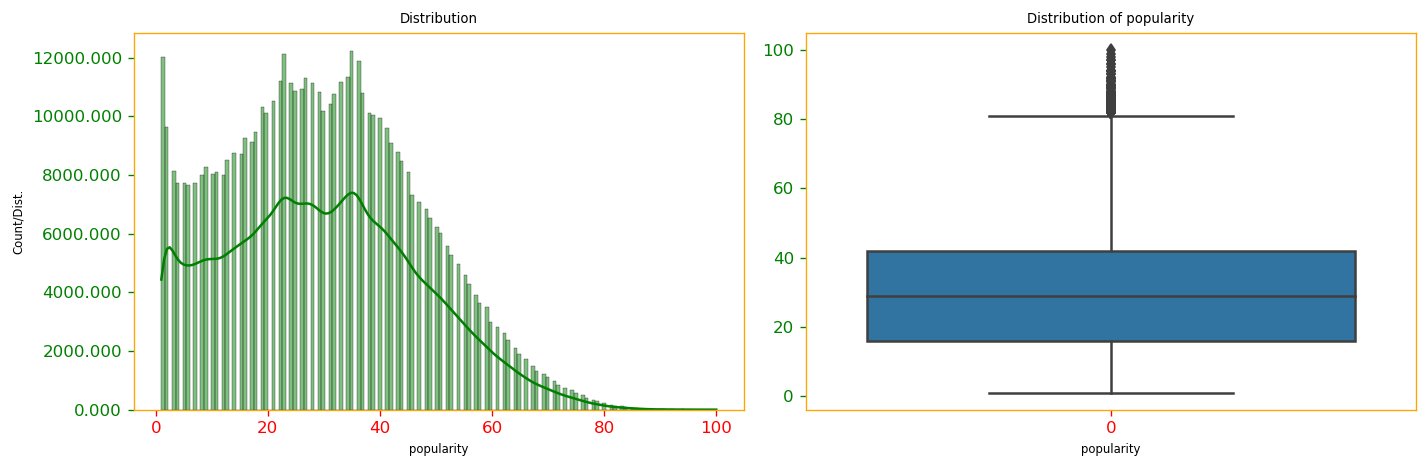

In [13]:
graph(df_popularity, 'popularity')

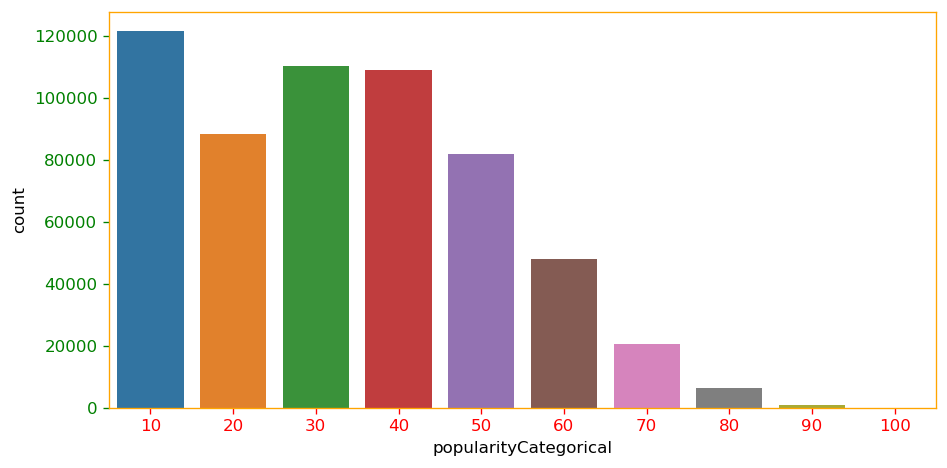

In [14]:
# Vale la pena hacer esto?

def f(row):
    if row['popularity'] < 10:
        val = 10
    elif row['popularity'] < 20:
        val = 20
    elif row['popularity'] < 30:
        val = 30
    elif row['popularity'] < 40:
        val = 40
    elif row['popularity'] < 50:
        val = 50
    elif row['popularity'] < 60:
        val = 60
    elif row['popularity'] < 70:
        val = 70
    elif row['popularity'] < 80:
        val = 80
    elif row['popularity'] < 90:
        val = 90
    else:
        val = 100
    return val

with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
    fig,axes = plt.subplots(nrows=1,ncols=1,dpi=120,figsize = (8,4))
    df['popularityCategorical'] = df.apply(f, axis=1)
    plot=sns.countplot(x='popularityCategorical', data= df)
    plt.tight_layout()

In [15]:
frecDF(df_popularity, 'popularity')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
1,12024,12024,2.2185,2.2185
2,9639,21663,1.7785,3.9970
3,8154,29817,1.5045,5.5015
4,7733,37550,1.4268,6.9283
5,7730,45280,1.4262,8.3545
...,...,...,...,...
96,2,541977,0.0004,99.9989
97,2,541979,0.0004,99.9993
98,1,541980,0.0002,99.9995
99,1,541981,0.0002,99.9997


In [16]:
df.energy.describe()

count    586672.000000
mean          0.542036
std           0.251923
min           0.000000
25%           0.343000
50%           0.549000
75%           0.748000
max           1.000000
Name: energy, dtype: float64

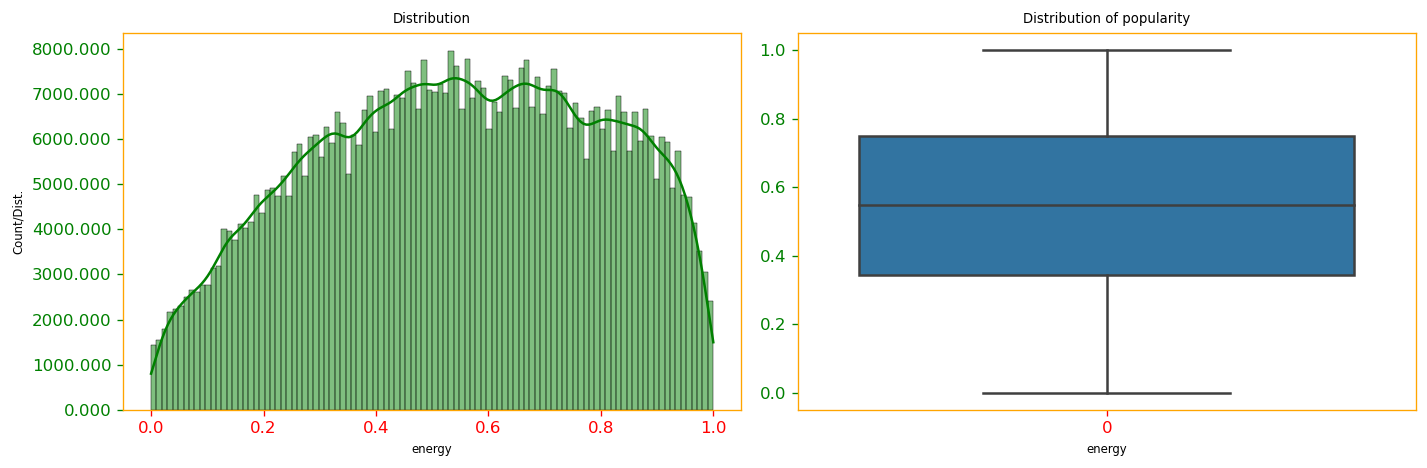

In [17]:
graph(df, "energy")

In [18]:
frecDF(df, 'energy')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0.00000,33,33,0.0056,0.0056
0.00002,2,35,0.0003,0.0059
0.00002,1,36,0.0002,0.0061
0.00002,2,38,0.0003,0.0064
0.00002,3,41,0.0005,0.0069
...,...,...,...,...
0.99600,255,585923,0.0435,99.8735
0.99700,245,586168,0.0418,99.9153
0.99800,223,586391,0.0380,99.9533
0.99900,217,586608,0.0370,99.9903


In [19]:
df.tempo.describe()

count    586672.000000
mean        118.464857
std          29.764108
min           0.000000
25%          95.600000
50%         117.384000
75%         136.321000
max         246.381000
Name: tempo, dtype: float64

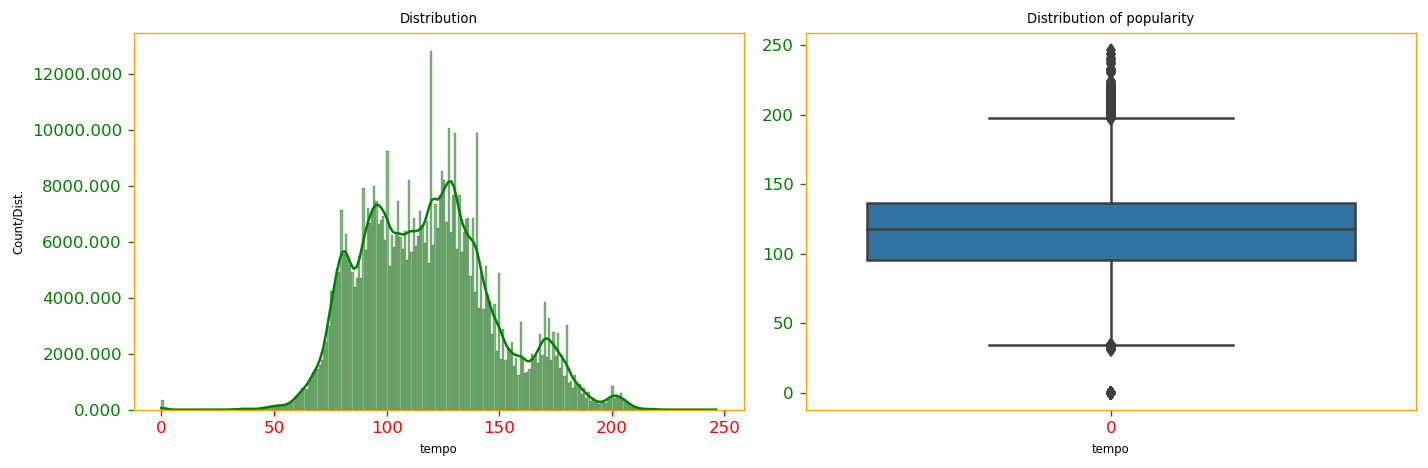

In [20]:
graph(df, 'tempo')

In [21]:
frecDF(df, 'tempo')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0.000,328,328,0.0559,0.0559
30.506,1,329,0.0002,0.0561
30.946,1,330,0.0002,0.0563
31.210,1,331,0.0002,0.0565
31.262,1,332,0.0002,0.0567
...,...,...,...,...
240.782,1,586668,0.0002,100.5001
243.372,1,586669,0.0002,100.5003
243.507,1,586670,0.0002,100.5005
243.759,1,586671,0.0002,100.5007
